# Static Masking Methods

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.filters import try_all_threshold
import skimage
from skimage.filters import threshold_otsu, threshold_local
import matplotlib.patches as mpatches

from skimage.filters import threshold_otsu, sobel
from skimage.segmentation import clear_border, slic, join_segmentations
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, watershed
from skimage.color import label2rgb

from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import skimage


In [2]:
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

In [3]:
cv2.setRNGSeed = 42

We can see that non of the static methods mainly from skimage hand build automatical mask for our images. The examples are mainly taken from the offical website and the code was not changed. Chaning parameters may improve the results

## Grabcut

### Example 1

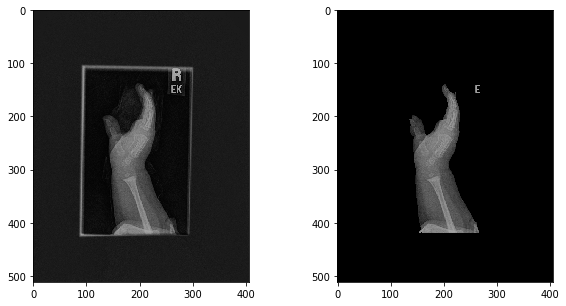

In [5]:
img = cv2.imread('../../data/train/XR_HAND/patient10709/study2_negative/image1.png')
mask = np.zeros(img.shape[:2],np.uint8)

rect = (110,130,160,290)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,100,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut = img*mask2[:,:,np.newaxis]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray') 
ax[1].imshow(img_grabcut, cmap='gray') 

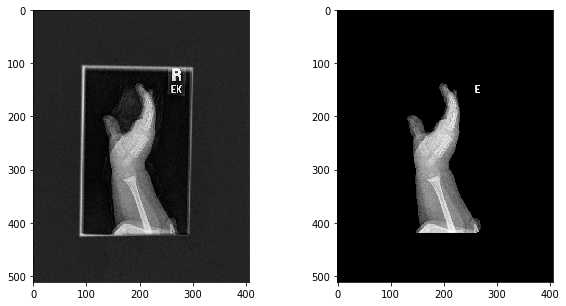

In [6]:
img = cv2.imread('../../data/train/XR_HAND/patient10709/study2_negative/image1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img1 = cv2.equalizeHist(img)
mask = np.zeros(img.shape[:2],np.uint8)
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB)

rect = (110,130,160,290)

cv2.grabCut(img1,mask,rect,bgdModel,fgdModel,100,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut = img*mask2

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray') 
ax[1].imshow(img_grabcut, cmap='gray') 

### Example 2

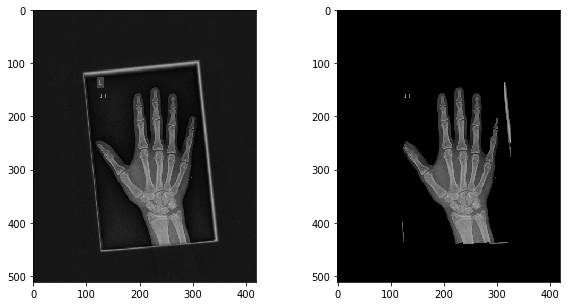

In [7]:
img = cv2.imread('../../data/train/XR_HAND/patient04442/study1_negative/image2.png')
mask = np.zeros(img.shape[:2],np.uint8)

rect = (123,135,204,305)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,100,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut = img*mask2[:,:,np.newaxis]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray') 
ax[1].imshow(img_grabcut, cmap='gray')

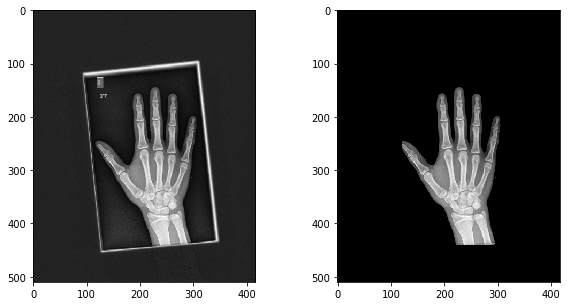

In [8]:
img = cv2.imread('../../data/train/XR_HAND_CROPPED/patient04442/study1_negative/image2.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img1 = cv2.equalizeHist(img)
mask = np.zeros(img.shape[:2],np.uint8)
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB)

rect = (121,135,206,305)

cv2.grabCut(img1,mask,rect,bgdModel,fgdModel,100,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut = img*mask2

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray') 
ax[1].imshow(img_grabcut, cmap='gray') 

### Example 3: With different iteration

Text(0.5, 1.0, 'Iteration: 250')

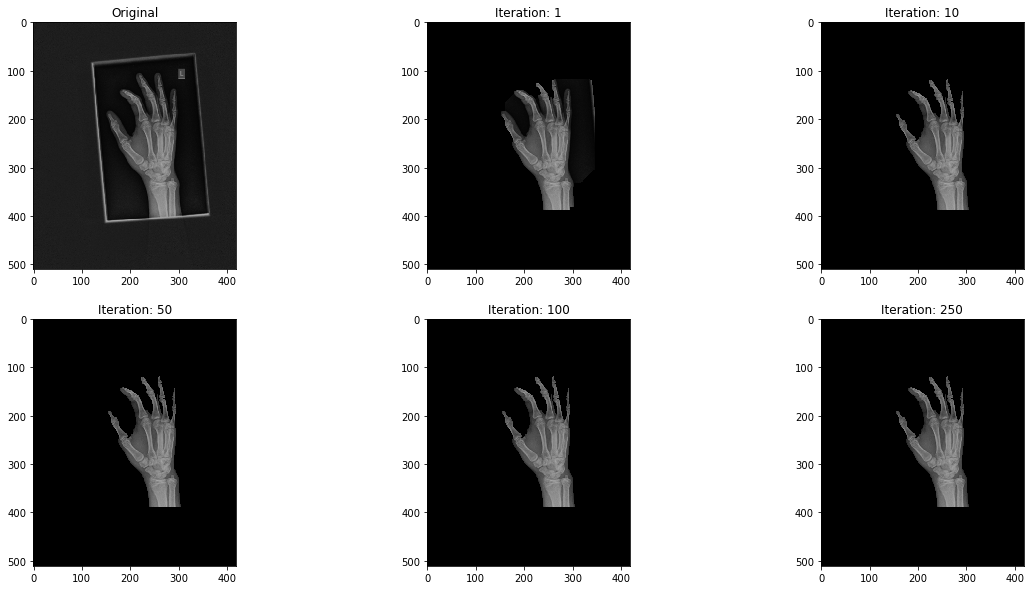

In [32]:
img = cv2.imread('../../data/train/XR_HAND/patient04442/study1_negative/image1.png')
mask = np.zeros(img.shape[:2],np.uint8)

rect = (147,120,200,270)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut = img*mask2[:,:,np.newaxis]

mask = np.zeros(img.shape[:2],np.uint8)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT)
mask3 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut_1 = img*mask3[:,:,np.newaxis]

mask = np.zeros(img.shape[:2],np.uint8)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,50,cv2.GC_INIT_WITH_RECT)
mask4 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut_2 = img*mask4[:,:,np.newaxis]

mask = np.zeros(img.shape[:2],np.uint8)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,100,cv2.GC_INIT_WITH_RECT)
mask5 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut_3 = img*mask5[:,:,np.newaxis]

mask = np.zeros(img.shape[:2],np.uint8)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,250,cv2.GC_INIT_WITH_RECT)
mask6 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut_4 = img*mask6[:,:,np.newaxis]


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title("Original")
ax[0,1].imshow(img_grabcut, cmap='gray')
ax[0,1].set_title("Iteration: 1")
ax[0,2].imshow(img_grabcut_1, cmap='gray')
ax[0,2].set_title("Iteration: 10")
ax[1,0].imshow(img_grabcut_2, cmap='gray')
ax[1,0].set_title("Iteration: 50")
ax[1,1].imshow(img_grabcut_3, cmap='gray')
ax[1,1].set_title("Iteration: 100")
ax[1,2].imshow(img_grabcut_4, cmap='gray')
ax[1,2].set_title("Iteration: 250")

Text(0.5, 1.0, 'Iteration: 10')

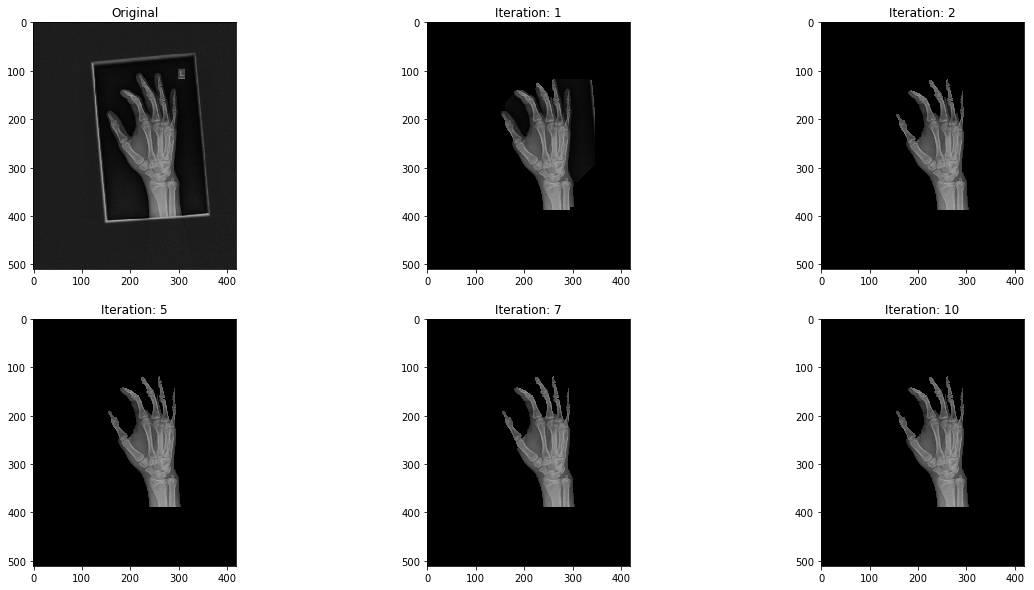

In [33]:
img = cv2.imread('../../data/train/XR_HAND/patient04442/study1_negative/image1.png')
mask = np.zeros(img.shape[:2],np.uint8)

rect = (147,120,200,270)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut = img*mask2[:,:,np.newaxis]

mask = np.zeros(img.shape[:2],np.uint8)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_RECT)
mask3 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut_1 = img*mask3[:,:,np.newaxis]

mask = np.zeros(img.shape[:2],np.uint8)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask4 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut_2 = img*mask4[:,:,np.newaxis]

mask = np.zeros(img.shape[:2],np.uint8)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,7,cv2.GC_INIT_WITH_RECT)
mask5 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut_3 = img*mask5[:,:,np.newaxis]

mask = np.zeros(img.shape[:2],np.uint8)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT)
mask6 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut_4 = img*mask6[:,:,np.newaxis]


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title("Original")
ax[0,1].imshow(img_grabcut, cmap='gray')
ax[0,1].set_title("Iteration: 1")
ax[0,2].imshow(img_grabcut_1, cmap='gray')
ax[0,2].set_title("Iteration: 2")
ax[1,0].imshow(img_grabcut_2, cmap='gray')
ax[1,0].set_title("Iteration: 5")
ax[1,1].imshow(img_grabcut_3, cmap='gray')
ax[1,1].set_title("Iteration: 7")
ax[1,2].imshow(img_grabcut_4, cmap='gray')
ax[1,2].set_title("Iteration: 10")

Text(0.5, 1.0, 'Iteration: 250')

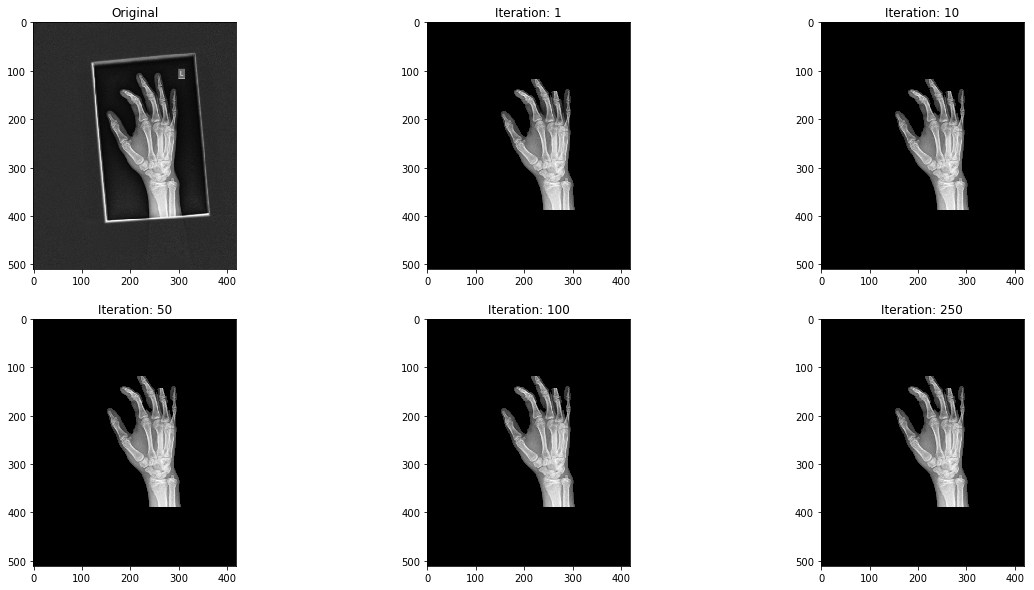

In [58]:
img = cv2.imread('../../data/train/XR_HAND/patient04442/study1_negative/image1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img1 = cv2.equalizeHist(img)
mask = np.zeros(img.shape[:2],np.uint8)
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB)


rect = (147,120,200,270)

cv2.grabCut(img1,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut = img*mask2

mask = np.zeros(img.shape[:2],np.uint8)
cv2.grabCut(img1,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT)
mask3 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut_1 = img*mask3

mask = np.zeros(img.shape[:2],np.uint8)
cv2.grabCut(img1,mask,rect,bgdModel,fgdModel,50,cv2.GC_INIT_WITH_RECT)
mask4 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut_2 = img*mask4

mask = np.zeros(img.shape[:2],np.uint8)
cv2.grabCut(img1,mask,rect,bgdModel,fgdModel,100,cv2.GC_INIT_WITH_RECT)
mask5 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut_3 = img*mask5

mask = np.zeros(img.shape[:2],np.uint8)
cv2.grabCut(img1,mask,rect,bgdModel,fgdModel,250,cv2.GC_INIT_WITH_RECT)
mask6 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut_4 = img*mask6


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title("Original")
ax[0,1].imshow(img_grabcut, cmap='gray')
ax[0,1].set_title("Iteration: 1")
ax[0,2].imshow(img_grabcut_1, cmap='gray')
ax[0,2].set_title("Iteration: 10")
ax[1,0].imshow(img_grabcut_2, cmap='gray')
ax[1,0].set_title("Iteration: 50")
ax[1,1].imshow(img_grabcut_3, cmap='gray')
ax[1,1].set_title("Iteration: 100")
ax[1,2].imshow(img_grabcut_4, cmap='gray')
ax[1,2].set_title("Iteration: 250")

### Example 4

(512, 512, 3)


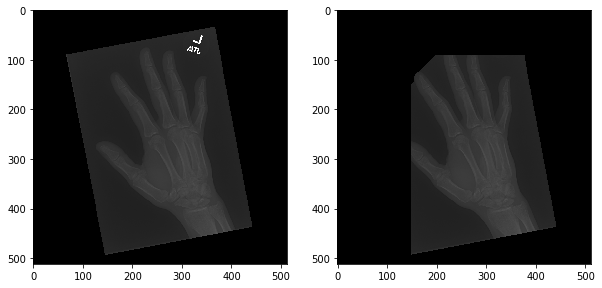

In [10]:
img = cv2.imread('../../data/train/XR_HAND/patient00050/study1_negative/image1.png')
print(img.shape)
mask = np.zeros(img.shape[:2],np.uint8)

rect = (150,90,301,405)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut = img*mask2[:,:,np.newaxis]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray') 
ax[1].imshow(img_grabcut, cmap='gray') 

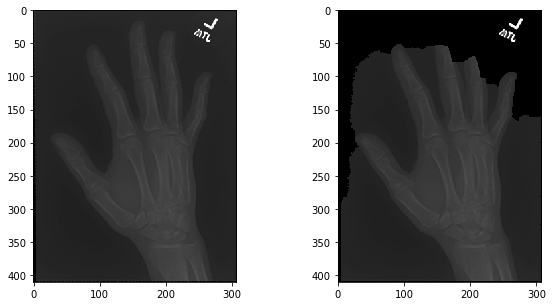

In [59]:
img = cv2.imread('../../data/train/XR_HAND/patient00050/study1_negative/image1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img1 = cv2.equalizeHist(img)
mask = np.zeros(img.shape[:2],np.uint8)
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB)

rect = (5,5,301,405)

cv2.grabCut(img1,mask,rect,bgdModel,fgdModel,100,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut = img*mask2

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray') 
ax[1].imshow(img_grabcut, cmap='gray') 

(510, 289, 3)


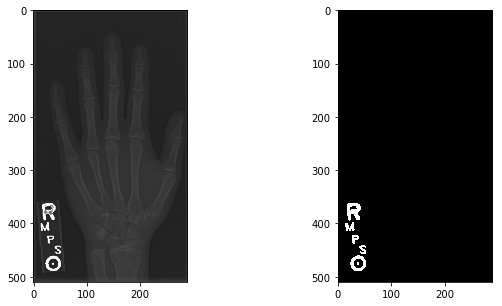

In [9]:
img = cv2.imread('../../data/train/XR_HAND/patient00051/study1_negative/image1.png')
print(img.shape)
mask = np.zeros(img.shape[:2],np.uint8)

rect = (10,10,250,500)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut = img*mask2[:,:,np.newaxis]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray') 
ax[1].imshow(img_grabcut, cmap='gray') 

plt.imshow(mask2, cmap='gray')


(510, 289)


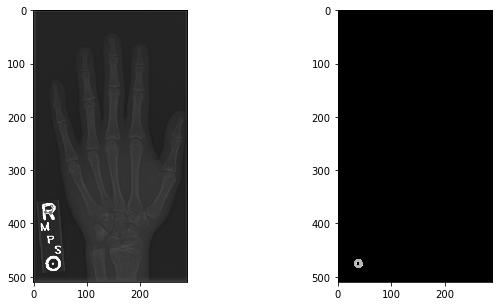

In [75]:
img = cv2.imread('../../data/train/XR_HAND/patient00051/study1_negative/image1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img1 = cv2.equalizeHist(img)
mask = np.zeros(img.shape[:2],np.uint8)
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB)

rect = (10,10,277,500)
print(img.shape)

cv2.grabCut(img1,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut = img*mask2

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray') 
ax[1].imshow(img_grabcut, cmap='gray') 

(507, 344, 3)


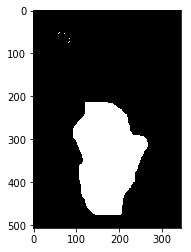

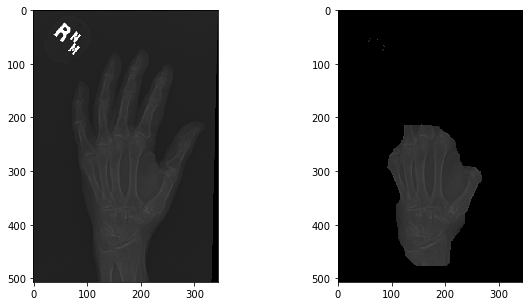

In [13]:
img = cv2.imread('../../data/train/XR_HAND/patient00218/study1_positive/image1.png')
print(img.shape)
mask = np.zeros(img.shape[:2],np.uint8)

rect = (50,50,270,427)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_grabcut = img*mask2[:,:,np.newaxis]

plt.imshow(mask2, cmap='gray')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray') 
ax[1].imshow(img_grabcut, cmap='gray') 




## Watershed Algorithm

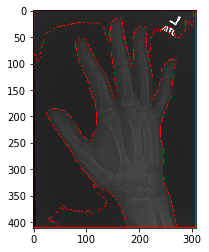

In [39]:
# Watershed Algorithm

img = cv2.imread('../../data/train/XR_HAND/patient00050/study1_negative/image1.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(img, cmap='gray')

In [57]:
img = cv2.imread('../../data/train/XR_HAND/patient00050/study1_negative/image1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


gray = img
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
markers[markers>1] = 1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [58]:
with np.printoptions(threshold=np.inf):
    print(markers)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [59]:
test = img*markers

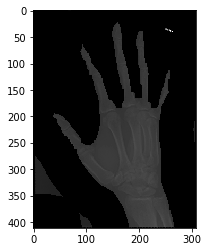

In [60]:
plt.imshow(test, cmap='gray')

## Threshold Methods

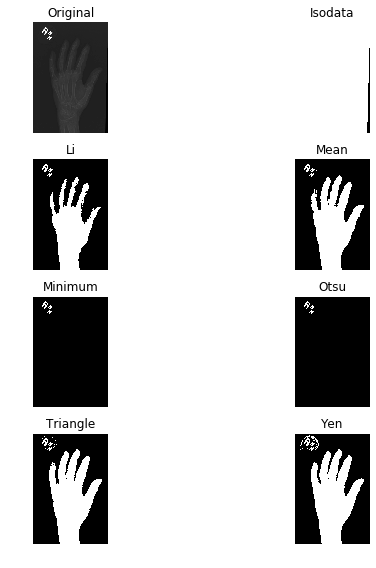

In [16]:
img = cv2.imread('../../data/train/XR_HAND/patient00218/study1_positive/image1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)

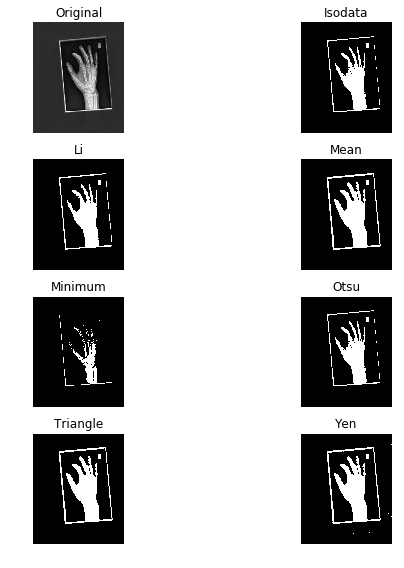

In [17]:
img = cv2.imread('../../data/train/XR_HAND/patient04442/study1_negative/image1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)

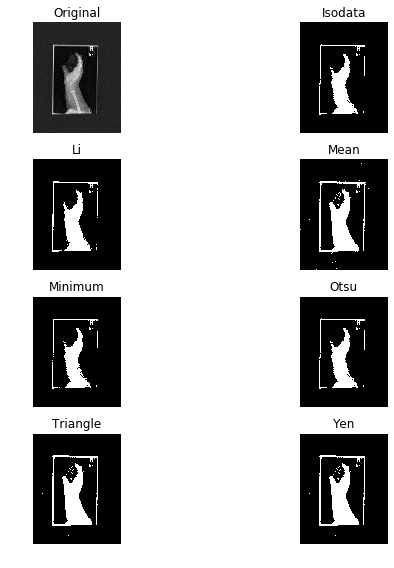

In [18]:
img = cv2.imread('../../data/train/XR_HAND/patient10709/study2_negative/image1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)

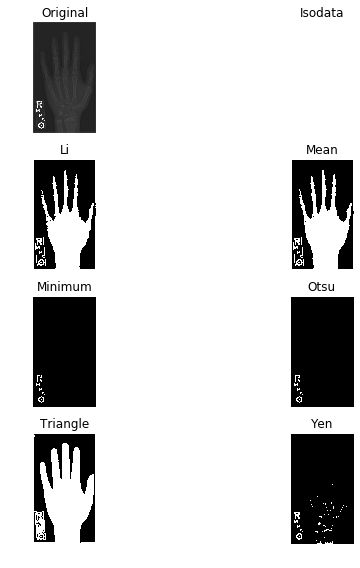

In [66]:
img = cv2.imread('../../data/train/XR_HAND/patient00051/study1_negative/image1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)

## Global vs local threshold

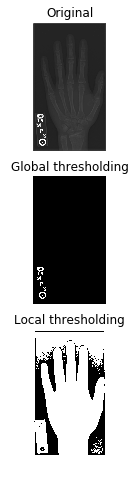

In [74]:


image = cv2.imread('../../data/train/XR_HAND/patient00051/study1_negative/image1.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)



global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 5001
local_thresh = threshold_local(image, block_size, offset=10)
binary_local = image > local_thresh

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(binary_local)
ax[2].set_title('Local thresholding')

for a in ax:
    a.axis('off')


## Random Walker

In [22]:
img = cv2.imread('../../data/train/XR_HAND/patient10709/study2_negative/image1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [29]:
markers = np.zeros(img.shape, dtype=np.uint)
markers[img < 20] = 1
markers[img > 235] = 2

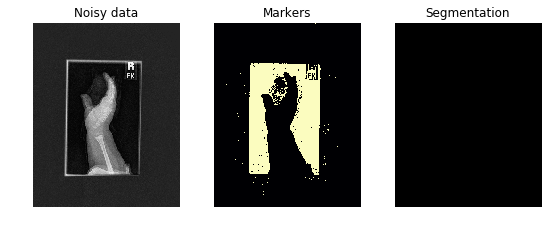

In [30]:
labels = random_walker(img, markers, beta=10, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2),
                                    sharex=True, sharey=True)
ax1.imshow(img, cmap='gray', interpolation='nearest')
ax1.axis('off')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='magma', interpolation='nearest')
ax2.axis('off')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray', interpolation='nearest')
ax3.axis('off')
ax3.set_title('Segmentation')

fig.tight_layout()

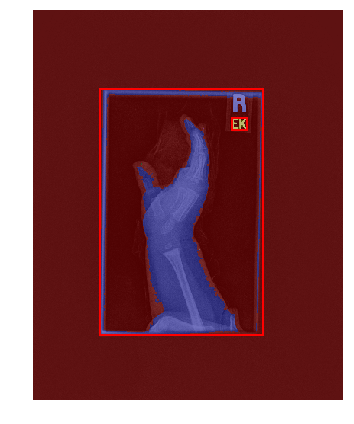

In [33]:


image = cv2.imread('../../data/train/XR_HAND/patient10709/study2_negative/image1.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()

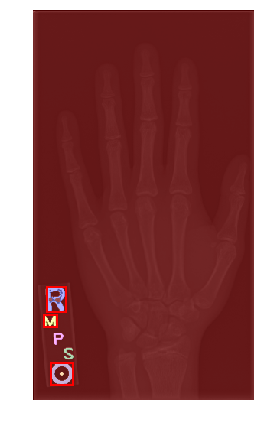

In [34]:
image = cv2.imread('../../data/train/XR_HAND/patient00051/study1_negative/image1.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()

## Watershed

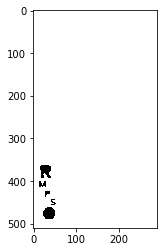

In [36]:


image = cv2.imread('../../data/train/XR_HAND/patient00051/study1_negative/image1.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Make segmentation using edge-detection and watershed.
edges = sobel(image)

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(image)
foreground, background = 1, 2
markers[image < 30.0] = foreground
markers[image > 230.0] = background

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

plt.imshow(seg1, cmap='gray', interpolation='nearest')

## Morphological

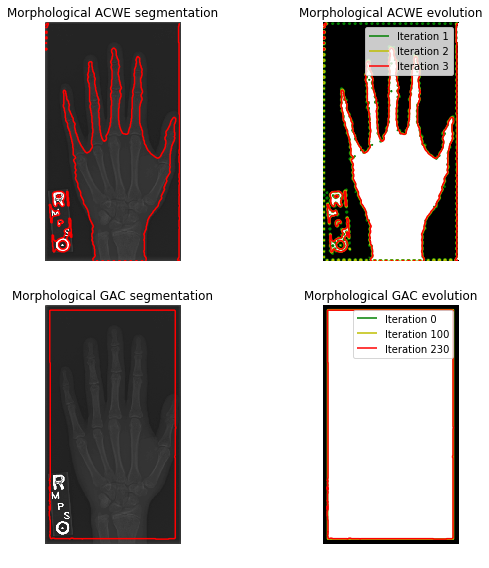

In [41]:
def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
image = cv2.imread('../data/train/XR_HAND_CROPPED/patient00051/study1_negative/image1.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = img_as_float(image)

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, 3, init_level_set=init_ls, smoothing=3,
                             iter_callback=callback)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[1], [0.5], colors='g')
contour.collections[0].set_label("Iteration 1")
contour = ax[1].contour(evolution[2], [0.5], colors='y')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 3")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)


# Morphological GAC
image = cv2.imread('../data/train/XR_HAND_CROPPED/patient00051/study1_negative/image1.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gimage = inverse_gaussian_gradient(image)

# Initial level set
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(gimage, 1, init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.69,
                                           iter_callback=callback)

ax[2].imshow(image, cmap="gray")
ax[2].set_axis_off()
ax[2].contour(ls, [0.5], colors='r')
ax[2].set_title("Morphological GAC segmentation", fontsize=12)

ax[3].imshow(ls, cmap="gray")
ax[3].set_axis_off()
contour = ax[3].contour(evolution[0], [0.5], colors='g')
contour.collections[0].set_label("Iteration 0")
contour = ax[3].contour(evolution[0], [0.5], colors='y')
contour.collections[0].set_label("Iteration 100")
contour = ax[3].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 230")
ax[3].legend(loc="upper right")
title = "Morphological GAC evolution"
ax[3].set_title(title, fontsize=12)

fig.tight_layout()
plt.show()

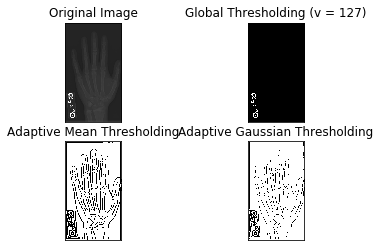

In [44]:

img = cv2.imread('../../data/train/XR_HAND/patient00051/study1_negative/image1.png', 0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
